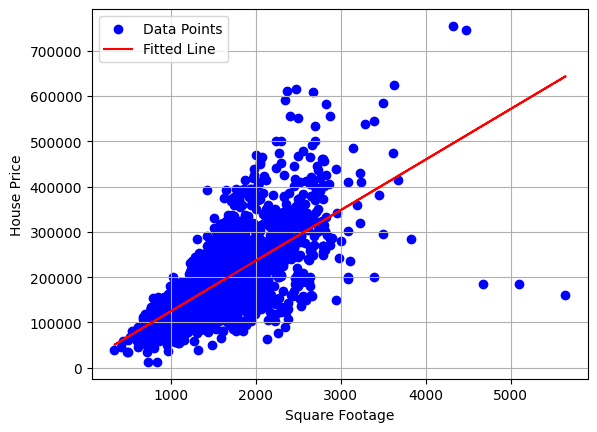

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
# From: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
df = pd.read_csv('AmesHousing.xls')

# Select relevant columns
X = df[['Gr Liv Area']]  # Above grade (ground) living area square footage
y = df['SalePrice']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Display slope and offset from sklearn
display(model.coef_)
model.intercept_

array([111.69400086])

np.float64(13289.634364759637)

In [20]:
x = df['Gr Liv Area']

In [21]:
# Calculate slope using formula from AIMA book.  See that it agrees with slope
# calculated above with sklearn.
w1 = (len(x) * x.dot(y) - x.sum() * y.sum()) / (len(x) * x.dot(x) - x.sum()**2)
w1

np.float64(111.69400085780036)

In [22]:
# Calculate offset using formula from AIMA book.  See that it agrees with offset
# calculated above with sklearn.
(y.sum() - w1 * x.sum()) / len(x)

np.float64(13289.634364759535)